<a href="https://colab.research.google.com/github/mariyajoseph2002/ml/blob/main/deepr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [4]:
from google.colab import files
uploaded = files.upload()

Saving healpal_mood_risk_dataset_5000.csv to healpal_mood_risk_dataset_5000 (1).csv


In [5]:
df = pd.read_csv("healpal_mood_risk_dataset_5000.csv")
X = df.drop(columns=["risk_level"])  # Features
y = df["risk_level"]  # Target labels (0, 1, 2, 3)


In [6]:
scaler = StandardScaler()
X["mood_trend"] = scaler.fit_transform(X[["mood_trend"]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#no need oof this
y_resampled = to_categorical(y_resampled, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [9]:
model = tf.keras.Sequential([
    Dense(16, activation="relu", input_shape=(X.shape[1],)),  # Input layer
    Dense(8, activation="relu"),  # Hidden layer
    Dense(4, activation="softmax")  # Output layer (4 risk levels)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [11]:
model.fit(X_resampled, y_resampled, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2596 - loss: 1.5721 - val_accuracy: 0.4800 - val_loss: 1.0978
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5840 - loss: 1.0078 - val_accuracy: 0.6830 - val_loss: 0.7368
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7716 - loss: 0.6393 - val_accuracy: 0.7890 - val_loss: 0.5220
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.4555 - val_accuracy: 0.8320 - val_loss: 0.4198
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8736 - loss: 0.3534 - val_accuracy: 0.8730 - val_loss: 0.3446
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8991 - loss: 0.2875 - val_accuracy: 0.9020 - val_loss: 0.2872
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2444 - val_accuracy: 0.9200 - val_loss: 0.2429
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.2021 - val_accuracy: 0.

In [12]:
feature_means = scaler.mean_
feature_stds = np.sqrt(scaler.var_)  # Standard deviation

print("Means:", feature_means)
print("Standard Deviations:", feature_stds)

Means: [39.81428571]
Standard Deviations: [18.74224193]


In [ ]:
model.save("depression_model2.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpe7hvl8jp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136247416468112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136247416468688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136247416468880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136247416470032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136247416469456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136247416470800: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
with open("depression_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved ")


TFLite model saved 


In [ ]:


files.download("depression_model.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
new_data = pd.DataFrame({
    "mood": [2],  # 😶 Numb (3)
    "social_interaction": [1],  # No, alone (1)
    "work_productivity": [0],  # 🤯 Struggled (3)
    "hobbies_selfcare": [2],  # 😕 No (3)
    "emotional_triggers": [1],  # Slight issues (1)
    "sleep_quality": [0],  # 😐 Fair (1)
    "appetite":[0],
    "mood_trend": [0.80]  # 60% (Continuous value)
})


In [14]:
new_data["mood_trend"] = scaler.transform(new_data[["mood_trend"]])

In [15]:
prediction = model.predict(new_data)

# Convert softmax probabilities to class labels (0, 1, 2, or 3)
predicted_class = np.argmax(prediction)

print(f"Predicted Depression Risk Level: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted Depression Risk Level: 1


In [44]:
print(f"X_test shape: {X_test.shape}")  # Should be (1000, num_features)


X_test shape: (1000, 8)


In [45]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [46]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average="weighted")  # Handles class imbalance
print(f"F1-Score: {f1:.2f}")



F1-Score: 0.95


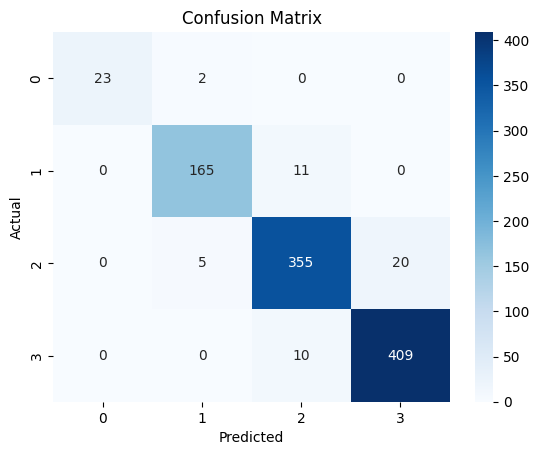

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [25]:
y_test.shape

(1000,)

In [41]:
prediction.shape

(1, 4)

In [31]:
y_pred=model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [42]:
y_pred.shape
y_pred

array([1.2135985e-10, 9.4189625e-03, 9.9034530e-01, ..., 6.8501056e-12,
       1.5112896e-04, 9.9984884e-01], dtype=float32)

In [40]:
y_pred = model.predict(X_test).flatten()  # Ensure it's a 1D array


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [43]:
from sklearn.metrics import confusion_matrix
y_pred = prediction.argmax(axis=1)
y_pred.shape

(1,)